In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  InputLayer , Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle

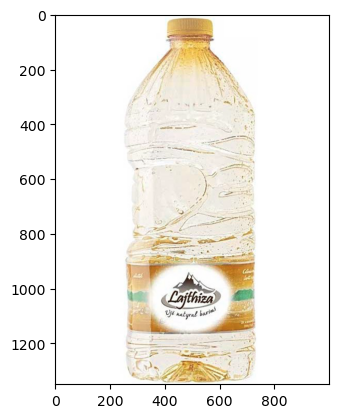

In [2]:
# NOTE: IF THE DATASET HASNT CHANGED AND YOU WANT TO KEEP THE SAME DATA PREPERATION TECHNIQUES AS THE ONES USED BELOW YOU CAN JUMP TO
# THE SECTION ON IMPORTING THE PICKLE FILE FORMAT.


DATADIR = "C:\\Users\\USER\\DataScience\\waterDataset"
CATEGORIES = ["lajthiza", "qafshtama","tepelena"]

# showing the first image in our dataset
for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            plt.imshow(img_array)
            plt.show()
            break
        break

In [3]:
# showing the arrays dimesnions of our image
print(img_array.shape)

(1350, 1000, 3)


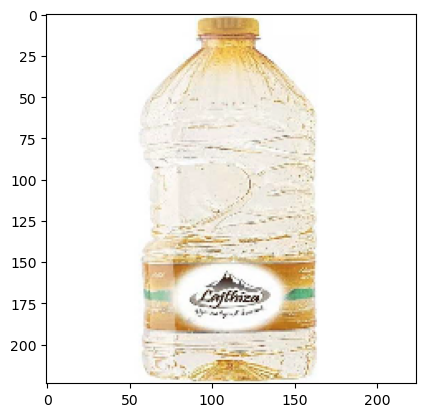

In [4]:
# image size
IMG_SIZE = 224;

# resizing the image till be we see the perfect fit
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
plt.imshow(new_array) 
plt.show() 

In [5]:

training_data = []

# creating a function to store inside of the training_data list the resized image and its corresponding labels
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        category_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, category_num])
            except Exception as e:
                pass

create_training_data()


In [6]:
# testing training_data length, to see if we have any loss of our data
print(len(training_data))

324


In [7]:
import  random

#shuffling data to reduce bias and avoid overfitting 
random.shuffle(training_data)

In [8]:
#features list, image data in a NUMpy array
img_data =[]
#brand list, catgories of botttels as indexes of the  category_num variable
labels_data = []


for features, brands in training_data:
    img_data.append(features)
    labels_data.append(brands)

img_data = np.array(img_data).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
labels_data = np.array(labels_data)


In [9]:
# Save the dataset in a binary file to reload it easily without reprocessing each time.
pickle_out = open("img_data_C&D.pickle", "wb")
pickle.dump(img_data, pickle_out)
pickle_out.close()

pickle_out = open("labels_data_C&D.pickle", "wb")
pickle.dump(labels_data, pickle_out)
pickle_out.close()

Total images: 259
Total labels: 259


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


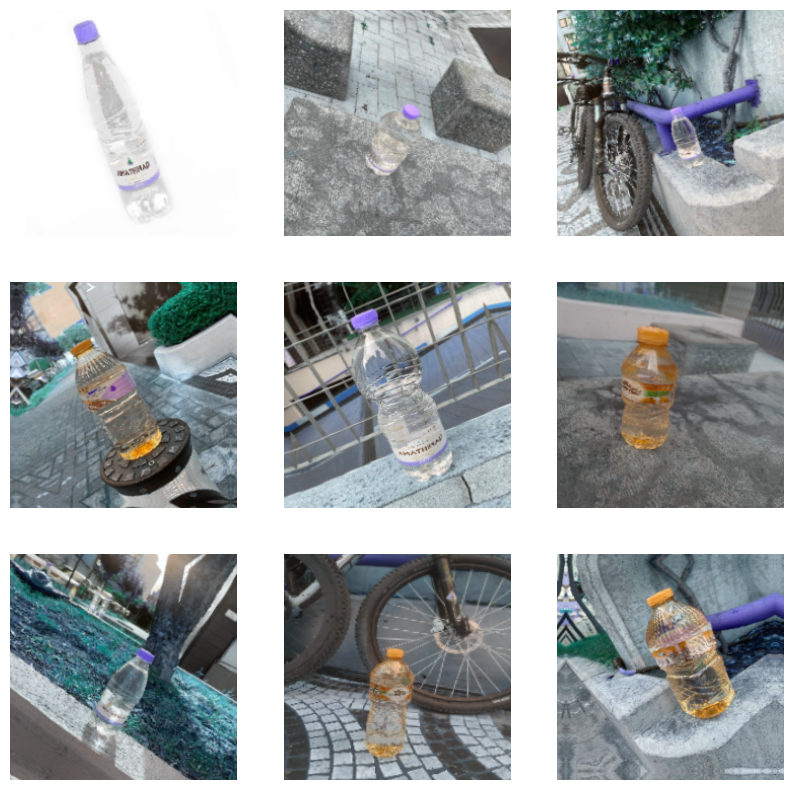

Total samples: 259
Training samples: 234
Validation samples: 25
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.2884 - loss: 1.5348 - val_accuracy: 0.2462 - val_loss: 1.0984
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.3190 - loss: 1.0917 - val_accuracy: 0.2462 - val_loss: 1.1716
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.4391 - loss: 1.0804 - val_accuracy: 0.2462 - val_loss: 1.0965
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.3635 - loss: 1.0592 - val_accuracy: 0.3231 - val_loss: 1.0643
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.4934 - loss: 0.9746 - val_accuracy: 0.6154 - val_loss: 0.8447
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.6143 - loss: 0.8704 - val_accuracy: 0.8000 - val_loss: 0.6246
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.7380 - loss: 0.6615 - val_accuracy: 0.6308 - val_loss: 0.8302
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - ac

In [11]:

# Loading data from the stored pickle foramt file and converting them into numPy array
img_data = np.array(pickle.load(open("img_data_C&D.pickle", "rb")))
labels_data = np.array(pickle.load(open("labels_data_C&D.pickle", "rb")))

# Get IMG_SIZE 
IMG_SIZE = img_data.shape[1]

# Split the data into training (80%) and test (20%) sets.
split_index = int(len(img_data) * 0.8) 
img_data_train, img_data_test = img_data[:split_index], img_data[split_index:]
labels_data_train, labels_data_test = labels_data[:split_index], labels_data[split_index:]


# Check the size of the train dataset
print(f"Total images: {len(img_data_train)}")
print(f"Total labels: {len(labels_data_train)}")

img_height, img_width = img_data_train.shape[1], img_data_train.shape[2]
num_classes = len(np.unique(labels_data_train))

# Applying data augmentation to the test image data to avoide overfitting.
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)


plt.figure(figsize=(10, 10))

# Displaing some augmented images
for i in range(9):
    augmented_images = data_augmentation(np.expand_dims(img_data_train[i], 0))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
plt.show()


model = Sequential([

        # Specifying the input layer of the data
        InputLayer(shape=(IMG_SIZE, IMG_SIZE, 3)),
    
        # Applying data augmentation and normalizing the image data
        data_augmentation,
        Rescaling(1./255),
            
        # Three convolutional layers with increasing complexity and max pooling to reduce dimensions and retain key features
        Conv2D(16, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 3, padding='same', activation='relu'),
        MaxPooling2D(),
            
        #Using dropout to randomly set the neurons to 0 to reduce noise and converting the data
        #into 1D array to feed into the dense layers with Flatten
        Dropout(0.2),
        Flatten(),
        
        # Performing feature extraction with 128 neurons using ReLU activation function
        Dense(128, activation='relu'),
        
        # Generating category probabilities using a final dense layer with softmaxactivation function
        Dense(num_classes, activation='softmax', name="outputs")
        ])

# Compiling the model
model.compile( optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


batch_size = 32
epochs = 50
validation_split = 0.1

num_validation_samples = int(validation_split * len(img_data_train))
num_training_samples = len(img_data_train) - num_validation_samples

print(f"Total samples: {len(img_data_train)}")
print(f"Training samples: {num_training_samples}")
print(f"Validation samples: {num_validation_samples}")

# training the model
history = model.fit(img_data_train, labels_data_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split, validation_data=(img_data_test, labels_data_test))

# evaluating the model
val_loss, val_accuracy = model.evaluate(img_data_train[int(validation_split * len(img_data_train)):], 
                                        labels_data_train[int(validation_split * len(labels_data_train)):])
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')


In [12]:
model.save('water_bottle_Conv&Dense_model.keras')

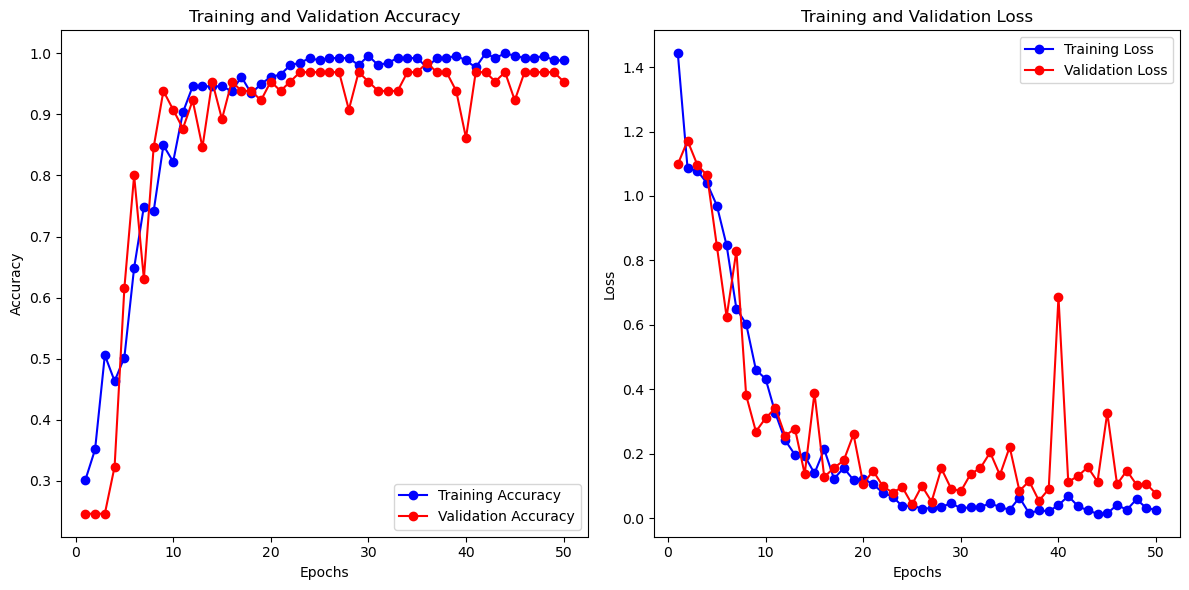

In [13]:

epochs = range(1, 51)

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()